# Usando outros gráficos no Power BI com Python

### Temos 2 bibliotecas muito usadas no Python para gráficos, além da matplotlib que já conhecemos:

- Plotly
- Seaborn

Você pode usar as duas que são muito boas. Vamos usar nesse exemplo a Seaborn

### Passo 1: Recriando os dataframes que estão no Power BI

In [1]:
import pandas as pd
import os
#importando os arquivos
caminho_padrao = r'C:/Users/Neylor Henrique/Documents/Python/Python e Power BI'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Vendas - 2017.csv'), sep=';', encoding='latin1')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';', encoding='latin1')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';', encoding='latin1')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';', encoding='latin1')

# Ajustar nome das colunas
produtos_df.rename(columns={'ÿNome da Marca': 'Nome da Marca'}, inplace=True)
clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'}, inplace=True)
lojas_df.rename(columns={'ÿID Loja': 'ID Loja'}, inplace=True)

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome da Marca']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
#display(vendas_df)
tres_lojas_df = vendas_df[vendas_df['ID Loja'].isin([86, 306, 172])]
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')
display(tres_lojas_df)

c:\Users\Neylor Henrique\anaconda3\envs\pythonpowerbi\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,2017-05-21,22/05/2017,1,86,981,1,21344,10,0,A. Datum,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Contoso,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,2017-06-08,11/06/2017,3,172,1287,1,559,5,0,Contoso,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,2017-09-17,23/09/2017,6,172,1236,3,13331,6,0,Fabrikam,Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,2017-10-18,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,2017-10-30,02/11/2017,3,172,937,1,341,10,0,Southridge Video,Loja Contoso Hartford,mpadfield9g@usnews.com


### Passo 2: Vamos agora criar um gráfico de linha para comparar as Vendas das 3 Lojas

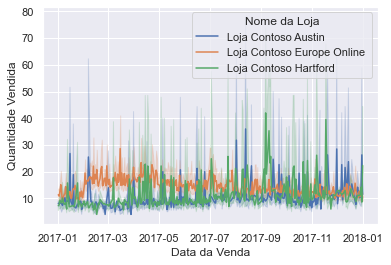

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=tres_lojas_df)


plt.show()

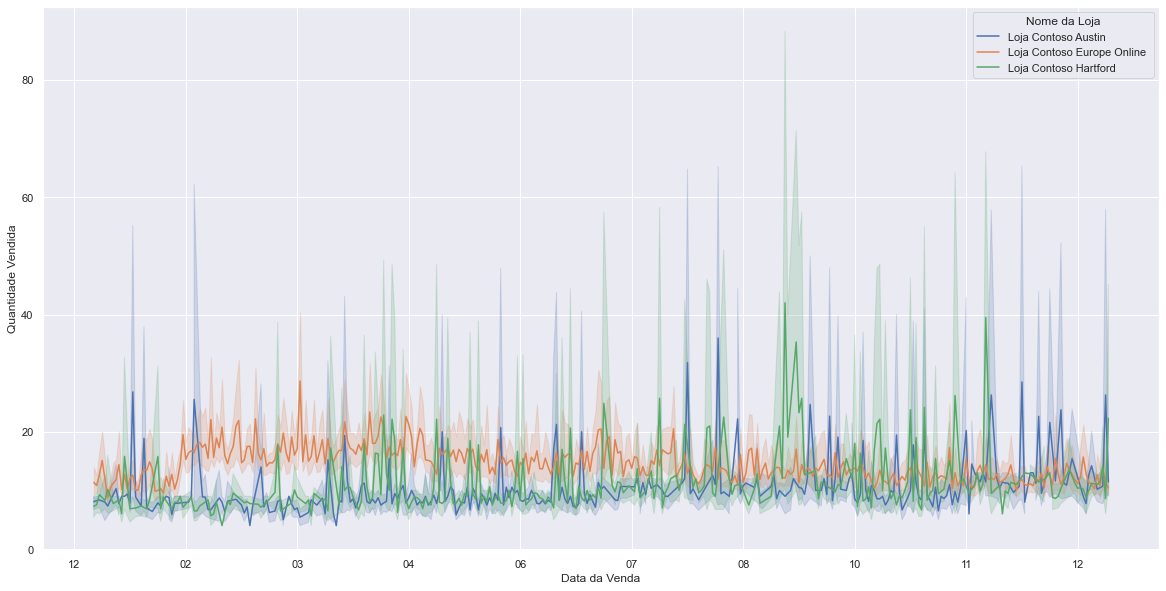

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(20, 10))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(DateFormatter("%m"))

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=tres_lojas_df, ax=ax)

plt.show()